In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Data to Pandas

In [130]:
flipkart_data = pd.read_csv("OnlineOrders_of_a_ecommerce_website.csv")

In [131]:
flipkart_data.head()

,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,brand
0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Alisha
1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor
2,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,AW
3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Alisha
4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Sicons


This Dataset content E-Commerce data with the date and time in which they have ordered.
As this a simple dataset, It has done to test your skills on pandas and data visualization. As the dataset is a bit messy
and not smooth, our goal is to make it clean and organized for data visualization. It is the first step to become 
a Data Scientist i.e., you have to work on data cleaning

#### First, Giving proper column names 

In [132]:
flipkart_data.rename(columns={'crawl_timestamp': 'Timestamp',
                              'product_name': 'Product_Name',
                             'product_category_tree': 'Product_Category_Tree',
                             'retail_price': 'Retail_Price',
                             'discounted_price': 'Discounted_Price',
                             'brand': 'Brand'}, inplace=True)

In [133]:
flipkart_data.head()

,Timestamp,Product_Name,Product_Category_Tree,Retail_Price,Discounted_Price,Brand
0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Alisha
1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor
2,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,AW
3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Alisha
4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Sicons


As we can see Product Category Tree column is not organised. So first make that
column as category and extract the category name from it. Also we don't 
want need the whole information.

As it have squared barckets and right arrow signs it look complex and confused structure. But break the things and watch carefully, the first word of the string is needed to fulfill our requirment.

So lets do it 

In [134]:

flipkart_data['Category'] = flipkart_data['Product_Category_Tree'].apply(lambda x: re.split('\[]*|\"|\>>|\,', x)[2])

#### So we successfully added a new column as category

In [135]:
flipkart_data.head(5)

,Timestamp,Product_Name,Product_Category_Tree,Retail_Price,Discounted_Price,Brand,Category
0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Alisha,Clothing
1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor,Furniture
2,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,AW,Footwear
3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Alisha,Clothing
4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Sicons,Pet Supplies


#### Removing  Product_Category_Tree Column

In [136]:
flipkart_data.drop(['Product_Category_Tree'], axis = 1, inplace= True)

In [137]:
flipkart_data.head()

,Timestamp,Product_Name,Retail_Price,Discounted_Price,Brand,Category
0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha,Clothing
1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor,Furniture
2,2016-03-25 22:59:23+00:00,AW Bellies,999.0,499.0,AW,Footwear
3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha,Clothing
4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons,Pet Supplies


#### Removing unnecessary Zero(Milliseconds) from Timestamp 

In [160]:
flipkart_data['Timestamp'] = flipkart_data['Timestamp'].apply(lambda x: x.split('+')[0])

In [161]:
flipkart_data.head()

,Timestamp,Product_Name,Retail_Price,Discounted_Price,Brand,Category
0,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha,Clothing
1,2016-03-25 22:59:23,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor,Furniture
2,2016-03-25 22:59:23,AW Bellies,999.0,499.0,AW,Footwear
3,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha,Clothing
4,2016-03-25 22:59:23,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons,Pet Supplies


#### So finally our dataset is clean and organized. So save it as CSV file for future use!

#### Read in updated dataframe

In [140]:
# Save the data as csv file
flipkart_data.to_csv('fkartDataset.csv', index=False)

In [141]:
flkart_data = pd.read_csv('ecom_Dataset.csv')

In [142]:
flkart_data.head()

,Timestamp,Product_Name,Retail_Price,Discounted_Price,Brand,Category
0,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha,Clothing
1,2016-03-25 22:59:23,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor,Furniture
2,2016-03-25 22:59:23,AW Bellies,999.0,499.0,AW,Footwear
3,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha,Clothing
4,2016-03-25 22:59:23,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons,Pet Supplies


#### Clean up the missing value

In [143]:
flkart_data.isnull().sum()

Timestamp           0
Product_Name        0
Retail_Price        0
Discounted_Price    0
Brand               0
Category            0
dtype: int64

#### We don't have any missing value

####  Question about this Dataset

##### 1. What was the best month for sales? How much was earned that months?
##### 2. What time should we display advertisements to maximize the likelihood of purchases? 
##### 3. Which category sold most in that six month period?
##### 4. Top 10 product sold most in that six month period?

**************************************************************************************

#### 1. What was the best month for sales? How much was earned that months?

So We can observe that we have a Timestamp Column but as per the Question We need months column, So we have the extract months from timestamp

In [149]:
#Adding the month column
flkart_data['Month'] = pd.to_numeric(pd.DatetimeIndex(flkart_data['Timestamp']).month)
flkart_data.head()

,Timestamp,Product_Name,Retail_Price,Discounted_Price,Brand,Category,Month
0,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha,Clothing,3
1,2016-03-25 22:59:23,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor,Furniture,3
2,2016-03-25 22:59:23,AW Bellies,999.0,499.0,AW,Footwear,3
3,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha,Clothing,3
4,2016-03-25 22:59:23,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons,Pet Supplies,3


In [150]:
totalsum = flkart_data.groupby('Month').sum()
totalsum 

,Retail_Price,Discounted_Price
Month,,
1,27306704.0,20047084.0
2,435315.0,264539.0
3,4141993.0,2507724.0
4,2224576.0,1391281.0
5,1181959.0,704162.0
6,1822710.0,938434.0


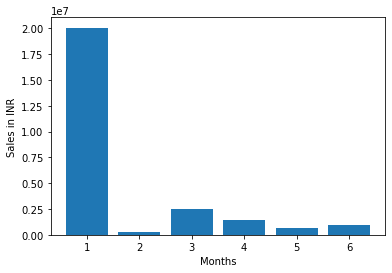

In [151]:
months = range(1, 7)
plt.bar(months, totalsum['Discounted_Price'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel('Sales in INR')
plt.show()

#### So January month is having more sales. May be due to new year eve####

#### 2.What time should we display advertisements to maximize the likelihood of purchases?

In [152]:
flkart_data['Timestamp'] = pd.to_datetime(flkart_data['Timestamp'])

In [153]:
flkart_data.head()

,Timestamp,Product_Name,Retail_Price,Discounted_Price,Brand,Category,Month
0,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha,Clothing,3
1,2016-03-25 22:59:23,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor,Furniture,3
2,2016-03-25 22:59:23,AW Bellies,999.0,499.0,AW,Footwear,3
3,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha,Clothing,3
4,2016-03-25 22:59:23,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons,Pet Supplies,3


In [154]:
flkart_data['Hour'] = flkart_data['Timestamp'].dt.hour
flkart_data['Minute'] = flkart_data['Timestamp'].dt.minute

In [155]:
flkart_data.head()

,Timestamp,Product_Name,Retail_Price,Discounted_Price,Brand,Category,Month,Hour,Minute
0,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha,Clothing,3,22,59
1,2016-03-25 22:59:23,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor,Furniture,3,22,59
2,2016-03-25 22:59:23,AW Bellies,999.0,499.0,AW,Footwear,3,22,59
3,2016-03-25 22:59:23,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha,Clothing,3,22,59
4,2016-03-25 22:59:23,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons,Pet Supplies,3,22,59


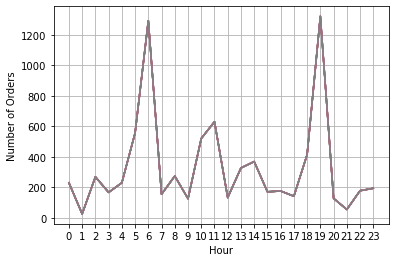

In [156]:
hours = [hour for hour, df in flkart_data.groupby('Hour')]

plt.plot(hours, flkart_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

##### So we can conclude that morning and evening are the perfect time to displaying advertisements

#### 3. Which category sold most in that six month period?

In [157]:
# So our target is to look after duplicates rows
dups_category = flkart_data.pivot_table(index=['Category'], aggfunc='size')

Category
Clothing                       2516
Jewellery                      1128
Mobiles & Accessories           698
Home Decor & Festive Needs      458
Footwear                        387
Tools & Hardware                359
dtype: int64


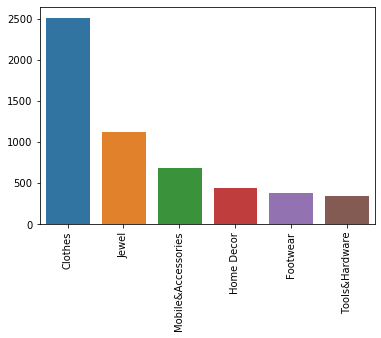

In [158]:
print(dups_category.nlargest(6))

x =list(range(1,7))

fig, ax = plt.subplots()
bar = sns.barplot(data=flkart_data, x=x , y=dups_category.nlargest(6), edgecolor="white")
ax.set_xticklabels(["Clothes", "Jewel", 'Mobile&Accessories', 'Home Decor', 'Footwear', 'Tools&Hardware'], rotation=90)
plt.show();

#### So obviously Clothings and Jewellery are the top categories to sold most.

#### 4. Top 10 product sold most in that six month period?

Product_Name
S4S Stylish Women's Push-up Bra                                     94
DailyObjects Back Cover for Apple iPad 2/3/4                        52
S4S Comfortable Women's Full Coverage Bra                           45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra         44
DailyObjects Back Cover for Apple iPad Mini/Retina Display          42
First Smart Deal Plant Container Set                                42
Grafion Comfortable Women's Full Coverage Bra                       40
Enthopia Back Cover for iPad Mini, iPad Mini 2, iPad Mini Retina    39
DailyObjects Back Cover for Apple iPad 2, 3, 4                      36
Fuson Back Cover for Samsung Galaxy J7                              33
dtype: int64


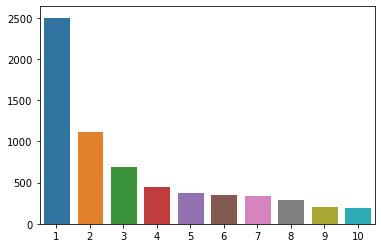

In [159]:
# So our target is to look after duplicates rows
dups_product = flkart_data.pivot_table(index=['Product_Name'], aggfunc='size')

print(dups_product.nlargest(10))
items = range(10)

x =list(range(1,11))
fig, ax = plt.subplots()
bar = sns.barplot(data=flkart_data, x=x , y=dups_category.nlargest(10), edgecolor="white")
plt.show();


#### Here are the top 10 products available respectively